# FASHION-MNIST DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Fashion-MNIST is a dataset of images consisting of 10 different fashion categories, with 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding fashion category. The Fashion-MNIST dataset is often used as a drop-in replacement for the original MNIST dataset, as it is more challenging and better represents real-world computer vision tasks.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

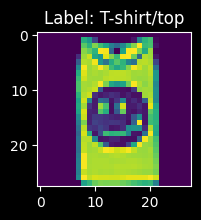

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## ANN


In [10]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(28, 28), name="input_layer"),
        Dense(128, activation="relu", name="hidden_layer_1"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-11 21:04:51.847591: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-11 21:04:51.847624: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-11 21:04:51.847640: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-11 21:04:51.847929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-11 21:04:51.847962: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
ann.layers

In [12]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
optimizer = Adam()
epochs = 5
ann.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

In [14]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/fashion-mnist_ann",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/fashion-mnist_ann_logs", histogram_freq=1, write_images=True
)
ann_csvlogger_callback = CSVLogger("../Logs/fashion-mnist_ann_logs.csv")

ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/5


2023-08-11 21:04:53.096873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


747/750 [============================>.] - ETA: 0s - loss: 0.5745 - sparse_categorical_accuracy: 0.8006

2023-08-11 21:05:00.585677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


750/750 [==============================] - 9s 12ms/step - loss: 0.5739 - sparse_categorical_accuracy: 0.8007 - val_loss: 0.4818 - val_sparse_categorical_accuracy: 0.8319
Epoch 2/5
748/750 [============================>.] - ETA: 0s - loss: 0.4606 - sparse_categorical_accuracy: 0.8396INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


750/750 [==============================] - 8s 11ms/step - loss: 0.4603 - sparse_categorical_accuracy: 0.8396 - val_loss: 0.4649 - val_sparse_categorical_accuracy: 0.8398
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.4458 - sparse_categorical_accuracy: 0.8446 - val_loss: 0.4798 - val_sparse_categorical_accuracy: 0.8335
Epoch 4/5
745/750 [============================>.] - ETA: 0s - loss: 0.4378 - sparse_categorical_accuracy: 0.8470INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


750/750 [==============================] - 11s 15ms/step - loss: 0.4376 - sparse_categorical_accuracy: 0.8470 - val_loss: 0.4487 - val_sparse_categorical_accuracy: 0.8439
Epoch 5/5
750/750 [==============================] - 7s 9ms/step - loss: 0.4320 - sparse_categorical_accuracy: 0.8497 - val_loss: 0.5295 - val_sparse_categorical_accuracy: 0.8190


In [15]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["sparse_categorical_accuracy"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_sparse_categorical_accuracy"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 0.46992279291152955
Validation loss: 0.4809579074382782
0.836342 Training accuracy with a standard deviation of 0.018112
0.833633 Validation accuracy with a standard deviation of 0.008500


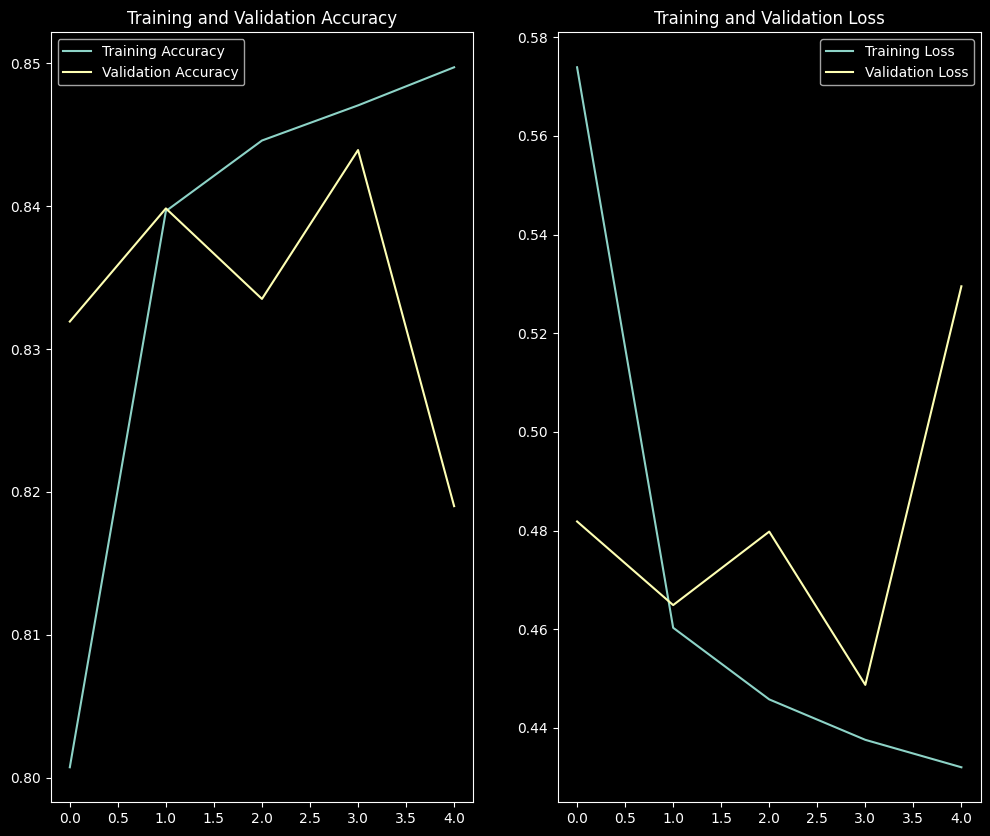

In [16]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/fashion-mnist_ann_acc_loss.png", bbox_inches="tight")

In [17]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.5524 - sparse_categorical_accuracy: 0.8090
Test loss: 0.5523934364318848
Test accuracy: 0.8090000152587891


In [18]:
y_pred = ann.predict(X_test)

 55/313 [====>.........................] - ETA: 0s

2023-08-11 21:05:40.433928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [19]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=3,
            activation="relu",
            padding="same",
            strides=1,
            input_shape=(28, 28, 1),
            name="conv_layer_1",
        ),
        MaxPooling2D(pool_size=2, strides=2, name="pooling_layer_1"),
        Conv2D(
            filters=64,
            kernel_size=3,
            activation="relu",
            padding="same",
            strides=1,
            name="conv_layer_2",
        ),
        MaxPooling2D(pool_size=2, strides=2, name="pooling_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(128, activation="relu", name="dense_layer_1"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [20]:
cnn.layers

In [21]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 28, 28, 32)        320       
                                                                 
 pooling_layer_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv_layer_2 (Conv2D)       (None, 14, 14, 64)        18496     
                                                                 
 pooling_layer_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_layer (Flatten)     (None, 3136)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 128)               401536  

In [22]:
cnn.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

In [23]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/fashion-mnist_cnn",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/fashion-mnist_cnn_logs", histogram_freq=1, write_images=True
)
cnn_csvlogger_callback = CSVLogger("../Logs/fashion-mnist_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/5


2023-08-11 21:05:42.362164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


748/750 [============================>.] - ETA: 0s - loss: 0.4181 - sparse_categorical_accuracy: 0.8508

2023-08-11 21:05:54.797378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


750/750 [==============================] - 15s 19ms/step - loss: 0.4176 - sparse_categorical_accuracy: 0.8509 - val_loss: 0.3366 - val_sparse_categorical_accuracy: 0.8808
Epoch 2/5
750/750 [==============================] - ETA: 0s - loss: 0.2998 - sparse_categorical_accuracy: 0.8948INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


750/750 [==============================] - 12s 16ms/step - loss: 0.2998 - sparse_categorical_accuracy: 0.8948 - val_loss: 0.3026 - val_sparse_categorical_accuracy: 0.8902
Epoch 3/5
750/750 [==============================] - 12s 15ms/step - loss: 0.2729 - sparse_categorical_accuracy: 0.9036 - val_loss: 0.3071 - val_sparse_categorical_accuracy: 0.8994
Epoch 4/5
750/750 [==============================] - 11s 14ms/step - loss: 0.2678 - sparse_categorical_accuracy: 0.9082 - val_loss: 0.3106 - val_sparse_categorical_accuracy: 0.8982
Epoch 5/5
750/750 [==============================] - 11s 15ms/step - loss: 0.2741 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.3305 - val_sparse_categorical_accuracy: 0.9022


In [24]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.30644899010658266
Validation loss: 0.31747187972068786
0.893025 Training accuracy with a standard deviation of 0.021579
0.894167 Validation accuracy with a standard deviation of 0.007818


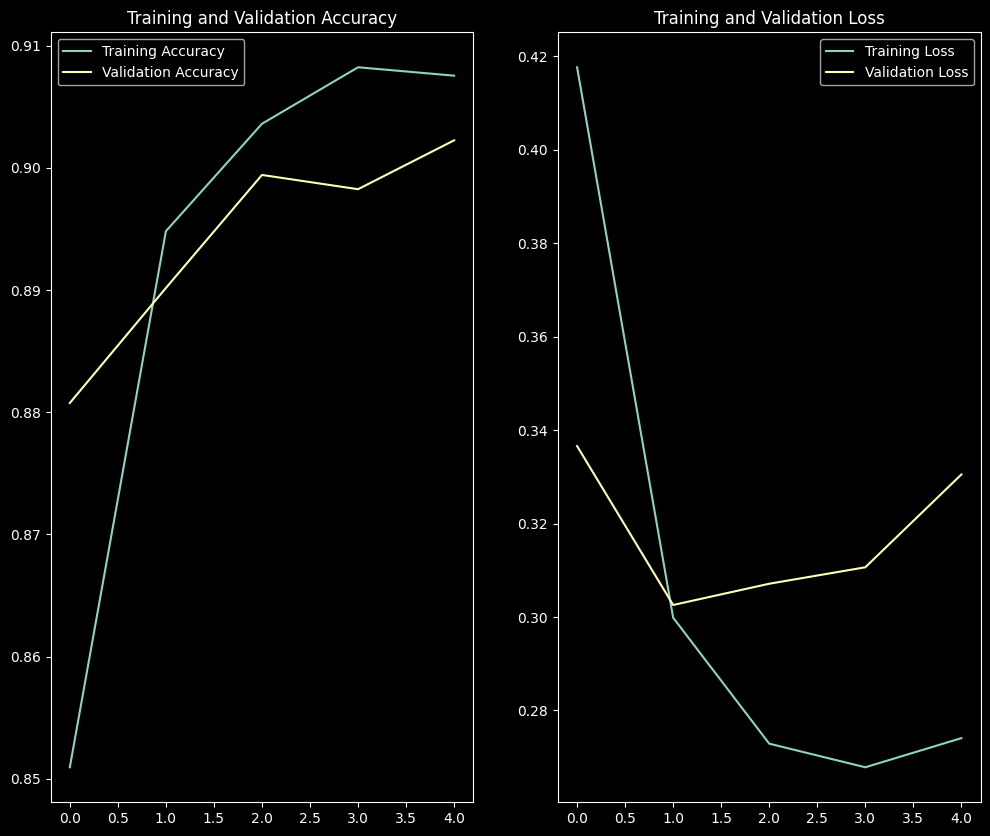

In [25]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/fashion-mnist_cnn_acc_loss.png", bbox_inches="tight")

In [26]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3527 - sparse_categorical_accuracy: 0.8954
Test loss: 0.3526715040206909
Test accuracy: 0.8953999876976013


In [27]:
y_pred = cnn.predict(X_test)

 57/313 [====>.........................] - ETA: 0s

2023-08-11 21:06:45.154373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
